3+5

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

path = r'/Users/mariokrstevski/Downloads/Domasna_rabota_metodologija/Barbara.tif'
img = cv2.imread(path,0)
cv2.imshow('image', img) 

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


FloatRangeSlider(value=(0.0, 1.0), description='Frequency cuttofs:', max=10.0, readout_format='.0f')

<IPython.core.display.Javascript object>


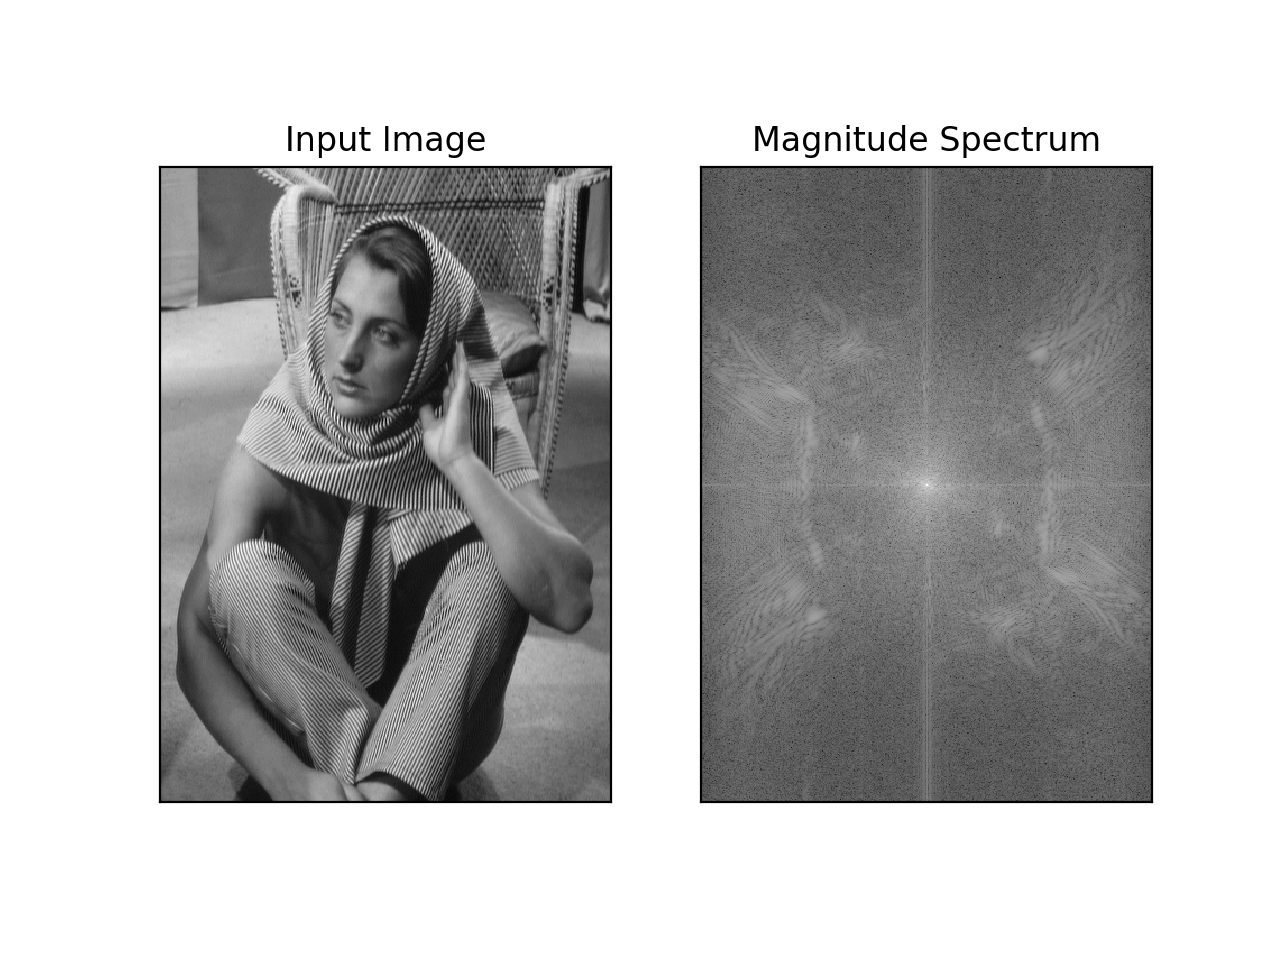

In [20]:
import cv2
from matplotlib import pyplot as plt
%matplotlib notebook

# %matplotlib nbagg

sl=widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=0., max=10., step=0.1,
    description='Frequency cuttofs:',
    readout_format='.0f',
)
display(sl)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2


mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1


fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image with universal IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

sl=widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=0., max=10., step=0.1,
    description='Frequency cuttofs:',
    readout_format='.0f',
)
display(sl)

In [25]:
%%file create_filter.m
function filter = create_filter(nx,ny,d0,d1)

filter = ones(nx,ny);

for i = 0:nx-1,
            for j = 0:ny-1
                 dist= sqrt((i-nx/2)^2 + (j-ny/2)^2);
                 filter(i+1,j+1) = exp(-dist^2/(2*(d1^2))).*(1.0-exp(-dist^2/(2*(d0^2))));
            end
end

filter(nx/2+1,ny/2+1)=1;
end

Created file '/Users/mariokrstevski/Documents/Projects/image-filtering/create_filter.m'.


In [ ]:
clear all
%read image
im = double(imread('Barbara.tif'));
%size of the image
[nx ny] = size(im);
%Transform the image from spatial to frequency domain
im_fft = fftshift(fft2(im));
% Create Gaussian bandpass kernels, in frequency domain, for 20 different cut off frequencies and filter the image
p=1;
for i = 1:10:101
q=1;
    for j = 1:10:101
        %Create the bandpass kernel
        tmp1 = create_filter(nx,ny,i,j);
        %Filter the image with the bandpass kernel and transform it back to spatial domain
        tmp = abs(ifft2(ifftshift(tmp1.*im_fft)));
        %Save the filtered image (in spatial domain) and kernel (in frequency domain) for visualization 
        filtered_image(p,q,:) = tmp(:);
        filter_kernel(p,q,:) = tmp1(:);
        q=q+1;
    end
    p=p+1;
end